In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
 # Replace 'your_data.txt' with the path to your file
df = pd.read_csv("/content/drive/MyDrive/ex1data1.txt", header=None, names=[ 'Population', 'Profit'])


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [7]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.3)

In [25]:
x_train = df['Population'].values
y_train = df['Profit'].values


In [26]:
print("x_train:", x_train[:5])
print("y_train:", y_train[:5])


x_train: [6.1101 5.5277 8.5186 7.0032 5.8598]
y_train: [17.592   9.1302 13.662  11.854   6.8233]


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model=LinearRegression()

In [29]:
model.fit(x_train.reshape(-1, 1),y_train) # Reshape x_train to a 2D array.

LinearRegression()

In [32]:
y_train.shape

(97,)

In [33]:
x_train.shape

(97,)

In [34]:
x_test.shape

(21,)

In [35]:
y_test.shape

(21,)

In [36]:
model.score(x_train.reshape(-1, 1),y_train)

0.7020315537841397

In [37]:
model.predict(x_train.reshape(-1, 1))

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

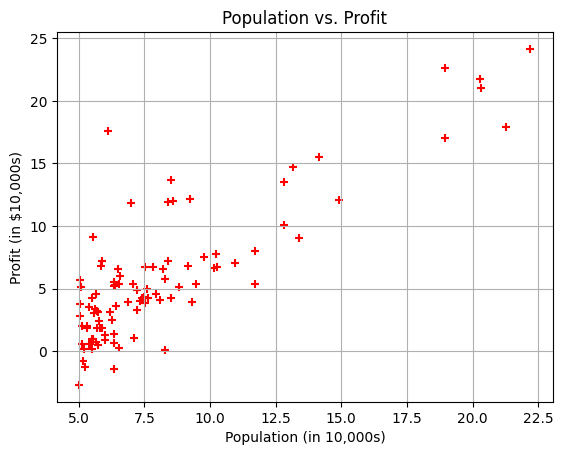

In [38]:
plt.scatter(x_train, y_train, color='red', marker='+')
plt.title('Population vs. Profit')
plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in $10,000s)')
plt.grid(True)
plt.show()


Exercise 1:

In [39]:


def compute_cost(x, y, w, b):
    """
    Compute the cost function for linear regression.

    Arguments:
    x -- numpy array, shape (m, ), feature values (population in this case)
    y -- numpy array, shape (m, ), true values (profit in this case)
    w -- scalar, the weight parameter (slope)
    b -- scalar, the bias parameter (intercept)

    Returns:
    total_cost -- the cost for the given parameters w and b
    """

    # Number of training examples
    m = x.shape[0]

    # Compute the prediction
    yp = np.dot(x, w) + b

    # Compute the cost
    total_cost = (1 / (2 * m)) * np.sum((yp - y) ** 2)

    return total_cost

# Example values for w and b
w = 2
b = 1

# Assuming x_train and y_train are already defined as numpy arrays
cost = compute_cost(x_train, y_train, w, b)
print(f"Cost: {cost}")


Cost: 75.20338497891959


In [40]:
initial_w = 2
initial_b = 1
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')
# Public tests

#from public_tests import *
#compute_cost_test(compute_cost)


<class 'numpy.float64'>
Cost at initial w: 75.203


Exercise 2:

In [41]:
def compute_gradient(x, y, w, b):
 # Number of training examples
 m = x.shape[0]

 # You need to return the following variables correctly
 dj_dw = 0
 dj_db = 0

 ### START CODE HERE ###

 yp = np.zeros(m)
 yp = np.dot(x, w) + b
 dj_db = (1 / m) * np.sum(yp-y)
 dj_dw = (1 / m) * np.sum((yp-y)*x)

 ### END CODE HERE ###

 return dj_dw, dj_db


In [42]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546392


In [43]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


In [44]:
def compute_gradient(x, y, w, b):

 # Number of training examples
 m = x.shape[0]

 # You need to return the following variables correctly
 dj_dw = 0
 dj_db = 0

 ### START CODE HERE ###

 yp = np.zeros(m)
 yp = np.dot(x, w) + b
 dj_db = (1 / m) * np.sum(yp-y)
 dj_dw = (1 / m) * np.sum((yp-y)*x)

 ### END CODE HERE ###

 return dj_dw, dj_db

In [45]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546392


In [46]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


In [47]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # number of training examples
 m = len(x)

 # An array to store cost J and w's at each iteration — primarily for graphing later
 J_history = []
 w_history = []
 w = copy.deepcopy(w_in) #avoid modifying global w within function
 b = b_in

 for i in range(num_iters):
 # Calculate the gradient and update the parameters
  dj_dw, dj_db = gradient_function(x, y, w, b )
 # Update Parameters using w, b, alpha and gradient
  w = w - alpha * dj_dw
  b = b - alpha * dj_db
 # Save cost J at each iteration
  if i<100000: # prevent resource exhaustion
    cost = cost_function(x, y, w, b)
    J_history.append(cost)
 # Print cost every at intervals 10 times or as many iterations if < 10
  if i% math.ceil(num_iters/10) == 0:
    w_history.append(w)
    print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")

 return w, b, J_history, w_history #return w and J,w history for graphin

In [48]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.
# some gradient descent settings
iterations = 1500
alpha = 0.01
w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74 
Iteration  150: Cost     5.31 
Iteration  300: Cost     4.96 
Iteration  450: Cost     4.76 
Iteration  600: Cost     4.64 
Iteration  750: Cost     4.57 
Iteration  900: Cost     4.53 
Iteration 1050: Cost     4.51 
Iteration 1200: Cost     4.50 
Iteration 1350: Cost     4.49 
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


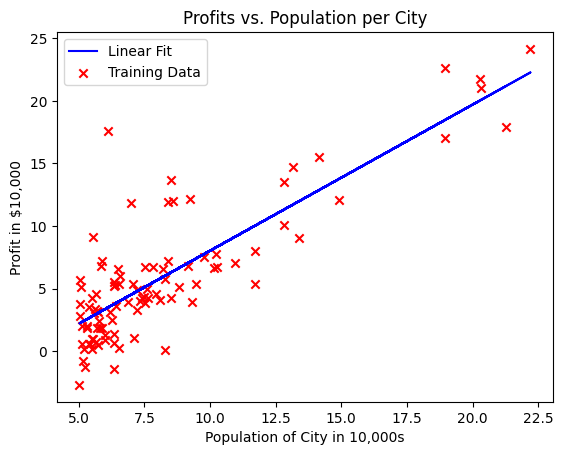

In [49]:
# Assuming x_train and y_train are your data points, and w, b are your fitted parameters
m = x_train.shape[0]
predicted = np.zeros(m)

# Calculate the predicted values based on the fitted line
for i in range(m):
    predicted[i] = w * x_train[i] + b

# Plot the linear fit
plt.plot(x_train, predicted, color='b', label='Linear Fit')

# Create a scatter plot of the original data
plt.scatter(x_train, y_train, marker='x', color='r', label='Training Data')

# Set the title and labels
plt.title("Profits vs. Population per City")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [50]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))
predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
